# Asset Allocation and Portfolio Optimization
- Investors balance risks and rewards, depending on individual goals of expected return, risk tolerance, investment horizon.
- MPT(mean-variance analysis), reflects how risk-averse investors construct portfolios to `maximize expected returns with given risk level`
- Related with diversification of portfolio, the lower correlation, the better it is for overall risk reduction.

## Evaluating the Performance of a Basic 1/n Porfolio(Naive Equal Weigted)

In [1]:
!pip install yfinance
!pip install pyfolio
import yfinance as yf
import pandas as pd
import numpy as np
import pyfolio as pf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
#set parameter
stock=['AMKR','ADBE','AAPL','INTC','MSFT','NVDA','T','ORCL','CRM']
SD='2021-01-01'
ED='2023-03-20'
n_assets=len(stock)

In [3]:
#download data from yfinance
price=yf.download(stock,SD,ED,progress=False)

In [4]:
#calculate the simple returns for individual assets
returns=price['Adj Close'].pct_change().dropna()
returns.head()

,AAPL,ADBE,AMKR,CRM,INTC,MSFT,NVDA,ORCL,T
Date,,,,,,,,,
2021-01-05,0.012364,0.000721,0.037559,0.005492,0.018925,0.000965,0.022210,-0.012392,-0.006114
2021-01-06,-0.033662,-0.039902,0.036199,-0.024242,0.009682,-0.025929,-0.058953,-0.002392,0.019481
2021-01-07,0.034123,0.024512,0.047411,0.008466,0.021331,0.028457,0.057830,0.007991,0.002682
2021-01-08,0.008631,0.015406,-0.007147,0.018626,-0.010347,0.006093,-0.005040,0.004915,-0.006896
2021-01-11,-0.023249,-0.022387,0.025195,-0.017069,-0.002130,-0.009698,0.025966,-0.005522,-0.005169


In [5]:
#define the equal weights for portfolio construction 
w=n_assets*[1/n_assets]
w

[0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111]

In [6]:
#calculate the portfolio returns with matrix multiplication
returns_portfolio=pd.Series(np.dot(w,returns.T),index=returns.index)

In [7]:
!pip uninstall pyfolio
!pip install git+https://github.com/quantopian/pyfolio

Found existing installation: pyfolio 0.9.2+75.g4b901f6
Uninstalling pyfolio-0.9.2+75.g4b901f6:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/pyfolio-0.9.2+75.g4b901f6.dist-info/*
    /usr/local/lib/python3.9/dist-packages/pyfolio/*
Proceed (Y/n)? Y
  Successfully uninstalled pyfolio-0.9.2+75.g4b901f6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-9jssotfx
  Running command git clone --filter=blob:none --quiet https://github.com/quantopian/pyfolio /tmp/pip-req-build-9jssotfx
  Resolved https://github.com/quantopian/pyfolio to commit 4b901f6d73aa02ceb6d04b7d83502e5c6f2e81aa
  Preparing metadata (setup.py) ... done
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75775 sha256=2b37255c146fc6df23bb719bf7a8cd40bd16d8482f927693b5a653f11be6fa88
  Stored in directory: /tmp/pip-ephem-wheel-cache-xsqgh9g5/wheels/b2/62/f1/189c72

/usr/local/lib/python3.9/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2021-01-05
End date,2023-03-17
Total months,26
,Backtest
Annual return,9.241%
Cumulative returns,21.447%
Annual volatility,27.697%
Sharpe ratio,0.46
Calmar ratio,0.24
Stability,0.10
Max drawdown,-39.198%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,39.20,2021-11-19,2022-10-12,NaT,NaN
1,9.87,2021-04-15,2021-05-12,2021-06-11,42
2,9.40,2021-02-16,2021-03-04,2021-04-05,35
3,6.60,2021-09-03,2021-10-04,2021-11-01,42
4,4.17,2021-01-21,2021-01-29,2021-02-04,11


/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


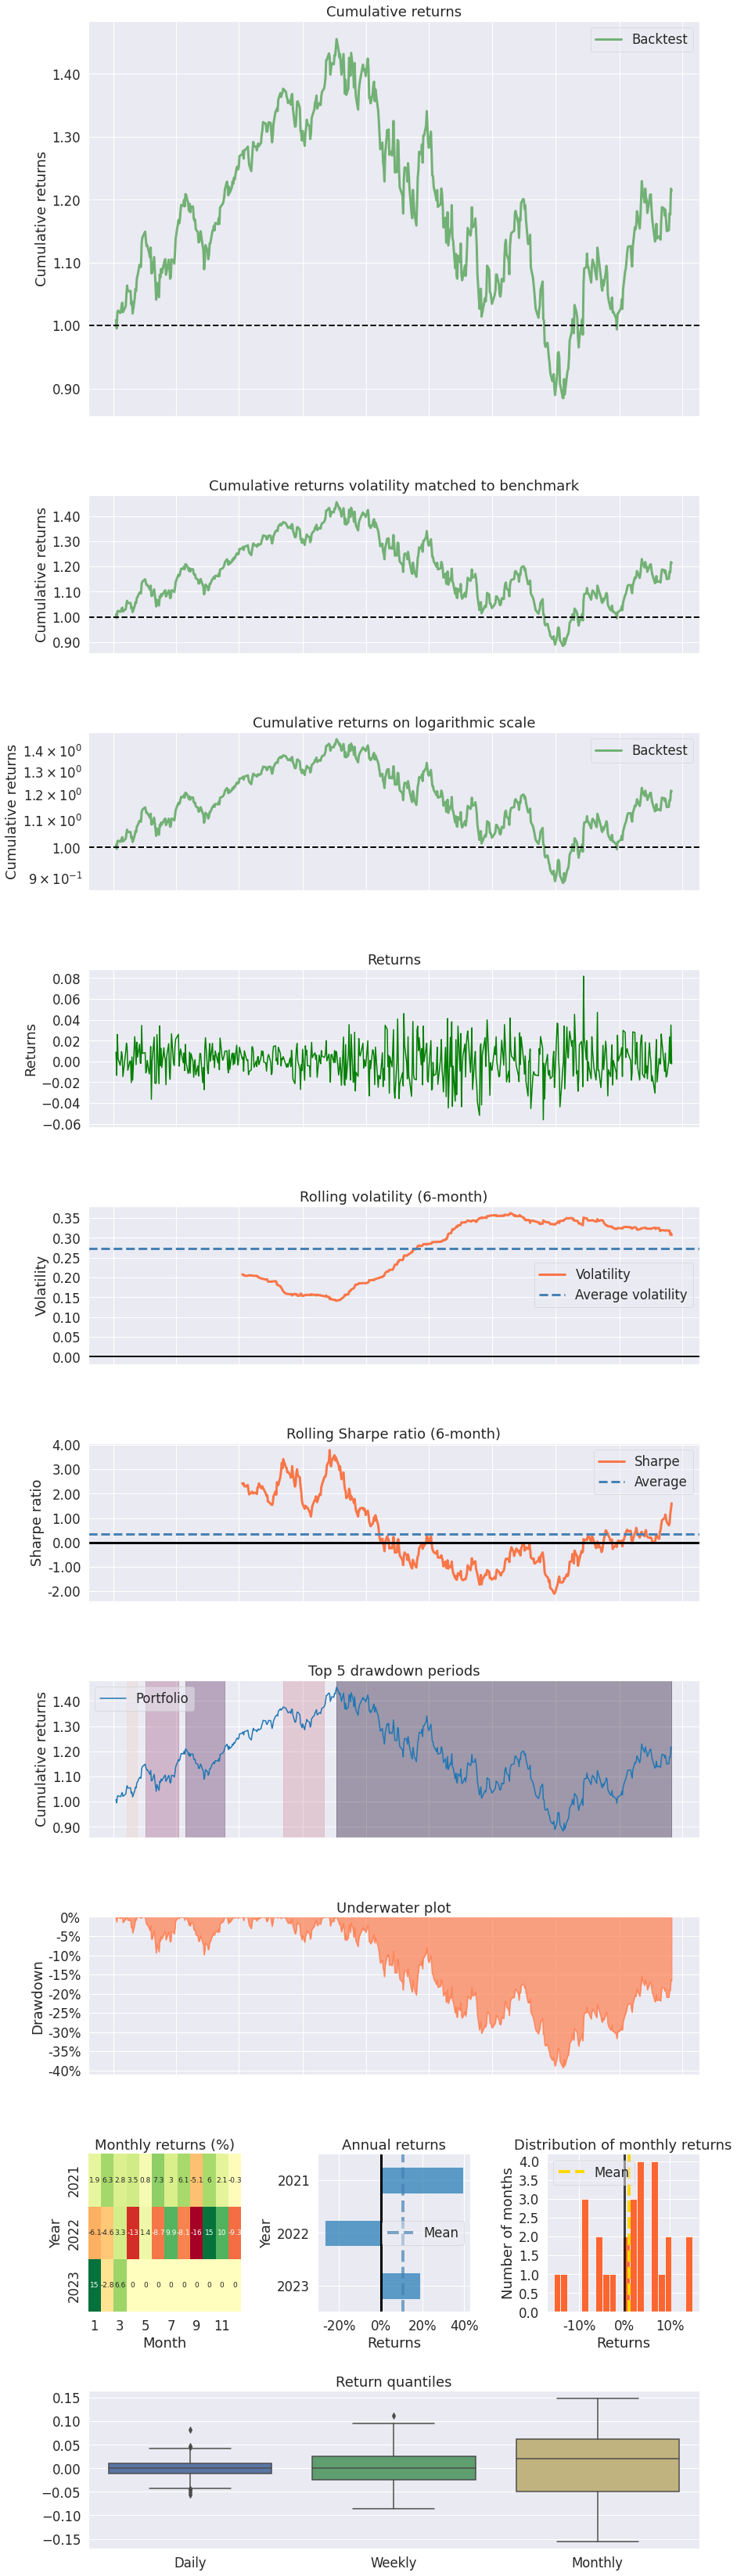

In [8]:
#create the tearsheet
pf.create_returns_tear_sheet(returns_portfolio)

- Sharpe Ratio: 
  - excess returns over the risk-free rate per unit std.
  - the greater SR, the better portfolio's risk adjusted performance
- Max-drawdown(MDD):
  - largest peak to vally loss. The lower, the better, meaning down movements could not be volatile.
  - $MDD=\frac{Tough-Peak}{Peak}$
  - it measures the largest losses
- Calmar Ratio(Drawdown Ratio): 
  - average annual compounded rate of return divided by *Max-drawdown*
  - it measures the amount of risk required to obtain a return.
  - the higher, the better, meaning the return of investment was not at the risk of significant drawdowns.
  - Formula: $CR=\frac{R_p-R_f}{MDD}$
- Stability: the R-squared of a linear fit to the cumulative log returns.
- Omega Ratio: 
  - probability-weighted ratio of <u>gains over losses</u> for a *determined return target threshold*
  - $Ω=\frac{\sum{Winning}-Benchmarking}{\sum{Benchmarking}-Losing}$
    - Mathmatically: $Ω=\frac{\int_r^b(1-F(x))dx}{\int_a^rF(x)dx}$
      - $F$: cumulative distribution function of returns
      - $r$: minimum acceptable return defined by investor
  - the higher Omega ratio, the greater probability that a given return will achieved or exceeded
- Sortino Ratio:改良版的sharpe ratio
  - Formula: $SR=\frac{R_p-R_f}{\sigma_d}$
    - $\sigma_d$: standard deviation of the **downside**
      - it consider the `negative returns`, while sharpe ratio also consider the *positive upside volatility*
- Tail Ratio:
  - Definition: The ratio (absolute) between the 95th and 5th percentile of the daily returns.
- Underwater plot: focus on losses, plots all the drawdown periods and how long they lasted 


## Finding Efficient Frontier using Monte Carlo Simulations
- Efficient Frontier: **optimal portfolios** in risk-return combination.
  - 🌟Porfolios on the frontier:
    - gain the *highest expected return* for a given level of risk
    - have a *lowest level of risk* for a given level of expected returns
- All portfolios under efficient frontier curve are sub-optimal 

In [9]:
n_portfolios=10**6 #set numbers of combinations for portfolios construction
time_horizon=252 #average numbers of trading day per year
risky_assets=['AAPL','TSLA','META','MSFT','GOOG']
risky_assets.sort() #to sort the stocks alphabetically
SD='2021-01-01'
ED='2021-12-31'
n_assets1=len(risky_assets)

In [10]:
prices=yf.download(risky_assets, start=SD, end=ED,progress=False)

In [11]:
#calculate the simple returns of individual stock, annual average return, and the annual covariance matrix
returns=prices['Adj Close'].pct_change().dropna()
avg_returns=returns.mean()*time_horizon
covariance_matrix = returns.cov()*time_horizon

In [12]:
#simulate the random portfolio weights
np.random.seed(42) #set for reproduction
weights= np.random.random(size=(n_portfolios, n_assets1)) #the matrix size is (numbers of simulation paths * numbers of assets)
weights /= np.sum(weights, axis=1)[:, np.newaxis] #divide and assign, the sum of weights equal 1 in total

The formula to calculate portfolio standard deviation:
- $W^T\sum W$
  - $W$: vector weight
  - $\sum$: historical covariance matrix
- Another way to get in coding: `np.diag(np.sqrt(np.dot(weights, np.dot(cov_mat, weights.T))))`


In [13]:
#Calculate the portfolio metrics
#get porfolio return by weighted average method
Rp= np.dot(weights, avg_returns) 

#calculate portfolio volatility
portfolio_volatility= [] #create a empty list
for i in range(0, len(weights)):
    portfolio_volatility.append(np.sqrt(np.dot(weights[i].T, np.dot(covariance_matrix, weights[i])))) #std calculation use for loop
portfolio_volatility= np.array(portfolio_volatility) #convert into an array
Rf=0.0178
portfolio_sharpe_ratio = (Rp-Rf)/portfolio_volatility #calculate sharpe ratio of portfolio

In [14]:
#save all of useful information into a dataframe
portfolio_results_df = pd.DataFrame({'returns': Rp,
                                     'volatility': portfolio_volatility,
                                     'sharpe_ratio': portfolio_sharpe_ratio})

In [15]:
#create Efficient Frontier
n_points = 1000
portfolio_volatility_ef = []
indices_to_skip = []
#create the array for expected returns from sample with min and max portfolio returns
portfolio_results_ef = np.linspace(portfolio_results_df.returns.min(), portfolio_results_df.returns.max(), n_points)
#for calculation smoothing, we round them into 2 decimals
portfolio_results_ef = np.round(portfolio_results_ef, 2) 
Rp = np.round(Rp, 2)

#for each given expected return, we find the `minimum observable volatility`
for point_index in range(n_points):
    if portfolio_results_ef[point_index] not in Rp:
        indices_to_skip.append(point_index) #we skip out and drop these unmatched points
        continue
    matched_ind = np.where(Rp==portfolio_results_ef[point_index])
    portfolio_volatility_ef.append(np.min(portfolio_volatility[matched_ind]))
    Rp_ef = np.delete(portfolio_results_ef, indices_to_skip)

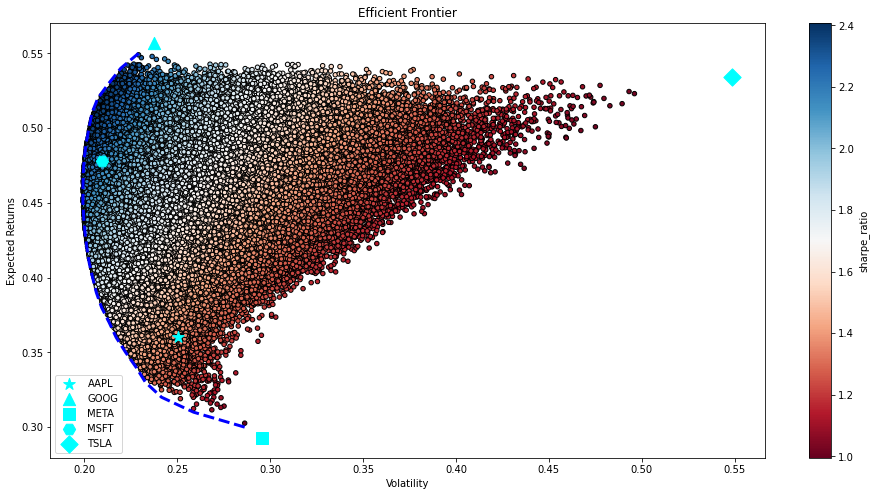

In [40]:
#plot the Efficient Frontier
import matplotlib.pyplot as plt
MARKS = ['*', '^', 's', 'H','D']
#https://www.runoob.com/matplotlib/matplotlib-marker.html
fig, ax = plt.subplots(figsize=(16,8))
#plot the simulated results
portfolio_results_df.plot(kind='scatter', 
                          x='volatility', 
                          y='returns', 
                          c='sharpe_ratio', #color differetiated by sharpe ratio
                          cmap='RdBu', 
                          edgecolors='black', 
                          ax=ax)
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')
#plot the efficient frontier
ax.plot(portfolio_volatility_ef, portfolio_results_ef, 'b--',linewidth=3)
#plot the selected stocks position
for asset_index in range(n_assets1):
    ax.scatter(x=np.sqrt(covariance_matrix.iloc[asset_index, asset_index]), 
               y=avg_returns[asset_index], 
               marker=MARKS[asset_index], 
               s=150, 
               color='cyan',
               label=risky_assets[asset_index])
ax.legend()

- We can find the portfolios with **maximum Sharpe Ratio**, which called **Tangency Portfolio** or one with  **Minimum Volatility**.

In [17]:
#find the portfolios indexes with Maximum Sharpe Ratio and Minimum Volatility
max_sharpe_index = np.argmax(portfolio_results_df.sharpe_ratio)
max_sharpe_portfolio = portfolio_results_df.loc[max_sharpe_index]

min_volatility_index = np.argmin(portfolio_results_df.volatility)
min_volatility_portfolio = portfolio_results_df.loc[min_volatility_index]

In [46]:
#check the components of portfolios
print('---- Maximum Sharpe ratio portfolio ----')
print('Performance:')
for index, value in max_sharpe_portfolio.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights:')
for x, y in zip(risky_assets, weights[np.argmax(portfolio_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

---- Maximum Sharpe ratio portfolio ----
Performance:
returns: 52.12% volatility: 20.91% sharpe_ratio: 240.77% 
Weights:
AAPL: 0.83% GOOG: 56.70% META: 0.55% MSFT: 41.39% TSLA: 0.53% 

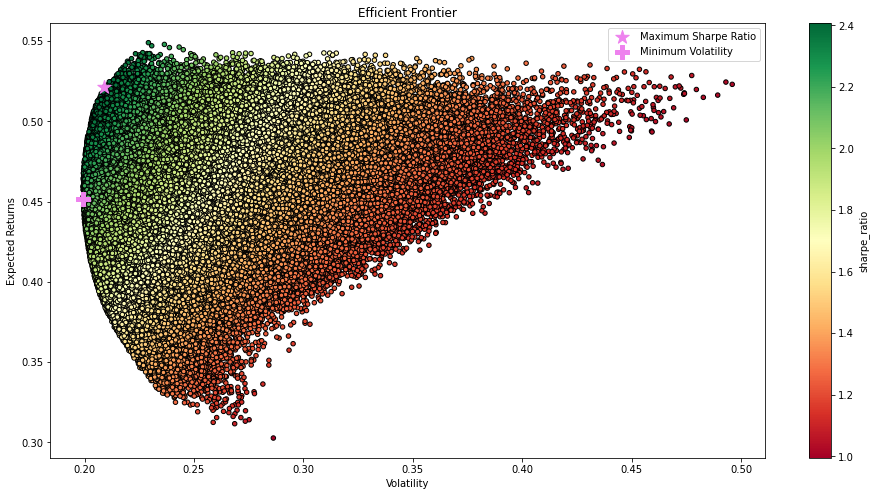

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
#plot the simulated results
portfolio_results_df.plot(kind='scatter', 
                          x='volatility', 
                          y='returns', 
                          c='sharpe_ratio',
                          cmap='RdYlGn', 
                          edgecolors='black', 
                          ax=ax)
#plot the portfolio with maximum sharpe ratio
ax.scatter(x=max_sharpe_portfolio.volatility, 
           y=max_sharpe_portfolio.returns, 
           c='violet', 
           marker='*', 
           s=200, 
           label='Maximum Sharpe Ratio')
#plot the portfolio with minimum volatility
ax.scatter(x=min_volatility_portfolio.volatility, 
           y=min_volatility_portfolio.returns, 
           c='violet', 
           marker='P', 
           s=200, 
           label='Minimum Volatility')
ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.legend()

In [29]:
print(min(portfolio_results_df['returns']), max(portfolio_results_df['returns']))

0.3026545087050307 0.5489992110398337


## Finding the Efficient Frontier using Optimization with Scipy
- Optimization idea: Find the optimal value of objective function by adjusting target variables with some constraints boundaries.
- In this case, out objective function: $f=min W^T\sum W$, with constrains:
  - $W>=0$
  - $W^T \mu=\mu_p$
    - $\mu$: vector of returns
    - $\mu_p$: expected portfolio return


In [23]:
import scipy.optimize as sco
#https://docs.scipy.org/doc/scipy/reference/optimize.html

In [32]:
average_return=avg_returns

In [33]:
#define the functions to calculate portfolio return and volatility
def port_return(w, average_return):
  return np.sum(average_return*w)
def port_volatility(w, average_return, covariance_matrix):
  return np.sqrt(np.dot(w.T,np.dot(covariance_matrix,w)))

In [34]:
#define the functions to create efficient frontier
def EfficientFrontier(average_return, covariance_matrix, returns_range):
  efficient_portfolios=[]
  n_assets=len(average_return)
  args=(average_return, covariance_matrix)
  bounds=tuple((0,1) for asset in range(n_assets))
  initial_guess= n_assets * [1/n_assets, ] #initially, we naived guess it is a equal weighted portfolio for each asset.

  for returns in returns_range:
    constraints=({'type':'eq',
                 'fun':lambda x: port_return(x,average_return)-returns},
                {'type':'eq',
                 'fun': lambda x: np.sum(x)-1})
    efficient_portfolio=sco.minimize(port_volatility,
                                     initial_guess,
                                     args=args, 
                                     method='SLSQP', #short for `Sequential Least-Squares Programming`
                                     constraints=constraints,
                                     bounds=bounds)
    efficient_portfolios.append(efficient_portfolio)
  return efficient_portfolios

In [35]:
#define the returns ranges
returns_range = np.linspace(0.30, 0.55, 200)

In [36]:
#calculate the efficient frontier, apply the function we have defined
efficient_portfolios=EfficientFrontier(average_return, covariance_matrix, returns_range)

In [37]:
#get the volatility ranges
volatilities_range = [x['fun'] for x in efficient_portfolios]

[Text(0.5, 0, 'Volatility'),
 Text(0, 0.5, 'Expected Returns'),
 Text(0.5, 1.0, 'Efficient Frontier')]

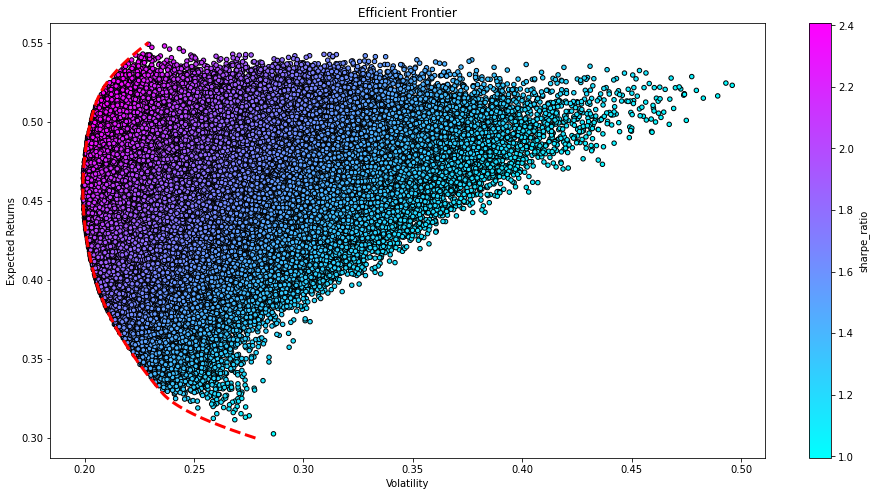

In [42]:
#plot the Efficient Frontier
fig, ax = plt.subplots(figsize=(16,8))
portfolio_results_df.plot(kind='scatter', 
                          x='volatility',
                          y='returns', 
                          c='sharpe_ratio',
                          cmap='cool', 
                          edgecolors='black', 
                          ax=ax)
ax.plot(volatilities_range, returns_range, 'r--', linewidth=3)
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')

- This graph is similar to what we got with Monte Carlo Simulation, but with Scipy this efficient fronter is much smoother.

In [43]:
#get the portfolio with minimum volatility
min_volatility_index = np.argmin(volatilities_range)
min_volatility_portfolio_return = returns_range[min_volatility_index]
min_volatility_portfolio_volatility = efficient_portfolios[min_volatility_index]['fun']

min_volatility_portfolio= {'Return': min_volatility_portfolio_return,
                           'Volatility': min_volatility_portfolio_volatility,
                           'Sharpe Ratio': ((min_volatility_portfolio_return-Rf) / min_volatility_portfolio_volatility)}

In [45]:
#check the components and performance of this portfolio
print('---- Minimum volatility portfolio ----')
print('Performance:')
for index, value in min_volatility_portfolio.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights:')
for x, y in zip(risky_assets, efficient_portfolios[min_volatility_index]['x']):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

---- Minimum volatility portfolio ----
Performance:
Return: 45.70% Volatility: 19.92% Sharpe Ratio: 220.54% 
Weights:
AAPL: 16.50% GOOG: 20.62% META: 9.66% MSFT: 53.21% TSLA: 0.00% 

## Finding the Efficient Frontier using Convex Optimization with Cvxpy

## Finding the Optimal Portfolio with Hierarchical Risk Parity(HRP)